# Data Exploration Project

In [1]:
#import required libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')

In [2]:
# read the data
df = pd.read_csv("mergedDF.csv", sep=",")
df = df.drop(columns=['Unnamed: 0'])

## Heatmaps
We compute the heatmaps to see which features have correlation to the salary. The features with correlation we will use to train our models.

In [3]:
df

,Age,Gender,City,yearsExperience,SeniorityLevel,salary,MainLanguage,CompanySize,CompanyType
0,43,M,München,11,Senior,77000,Deutsch,100-1000,Product
1,33,F,München,8,Senior,65000,Deutsch,50-100,Product
2,32,M,München,10,Senior,88000,Deutsch,1000+,Product
3,25,M,München,6,Senior,78000,English,1000+,Product
4,39,M,München,10,Senior,69000,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...
2598,31,M,Berlin,9,Senior,70000,English,51-100,Product
2599,33,M,Berlin,10,Senior,60000,English,1000+,Product
2600,39,M,Munich,15,Lead,110000,English,101-1000,eCommerce
2601,26,M,Saarbrücken,7,Middle,38350,German,101-1000,Product


In [4]:
#define differents dataframes with only 1-2 features, because the heatmap with all features is really messy
df_corr_CompanySize = df.loc[:, ["CompanySize", "salary"]]
df_corr_CompanyType = df.loc[:, ["CompanyType", "salary"]]
df_corr_Age_Gender = df.loc[:, ["Age", "Gender", "salary"]]
df_corr_yearsExperience = df.loc[:, ["yearsExperience", "salary"]]
df_corr_SeniorityLevel = df.loc[:, ["SeniorityLevel", "salary"]]
df_corr_MainLanguage = df.loc[:, ["MainLanguage", "salary"]]

In [5]:
#get dummies for the dataframes
df_corr_CompanySize = pd.get_dummies(df_corr_CompanySize)
df_corr_CompanyType = pd.get_dummies(df_corr_CompanyType)
df_corr_Age_Gender = pd.get_dummies(df_corr_Age_Gender)
df_corr_yearsExperience = pd.get_dummies(df_corr_yearsExperience)
df_corr_SeniorityLevel = pd.get_dummies(df_corr_SeniorityLevel)
df_corr_MainLanguage = pd.get_dummies(df_corr_MainLanguage)

In [6]:
#compute the correlations
df_corr_CompanySize = df_corr_CompanySize.corr()
df_corr_CompanyType = df_corr_CompanyType.corr()
df_corr_Age_Gender = df_corr_Age_Gender.corr()
df_corr_yearsExperience = df_corr_yearsExperience.corr()
df_corr_SeniorityLevel = df_corr_SeniorityLevel.corr()
df_corr_MainLanguage = df_corr_MainLanguage.corr()

Correlation between salary and the Company Type
The correlation is really small for each company type (around 0.04 - 0.01). The reason is probably because we haven't much data, but we have many differents Company Types.


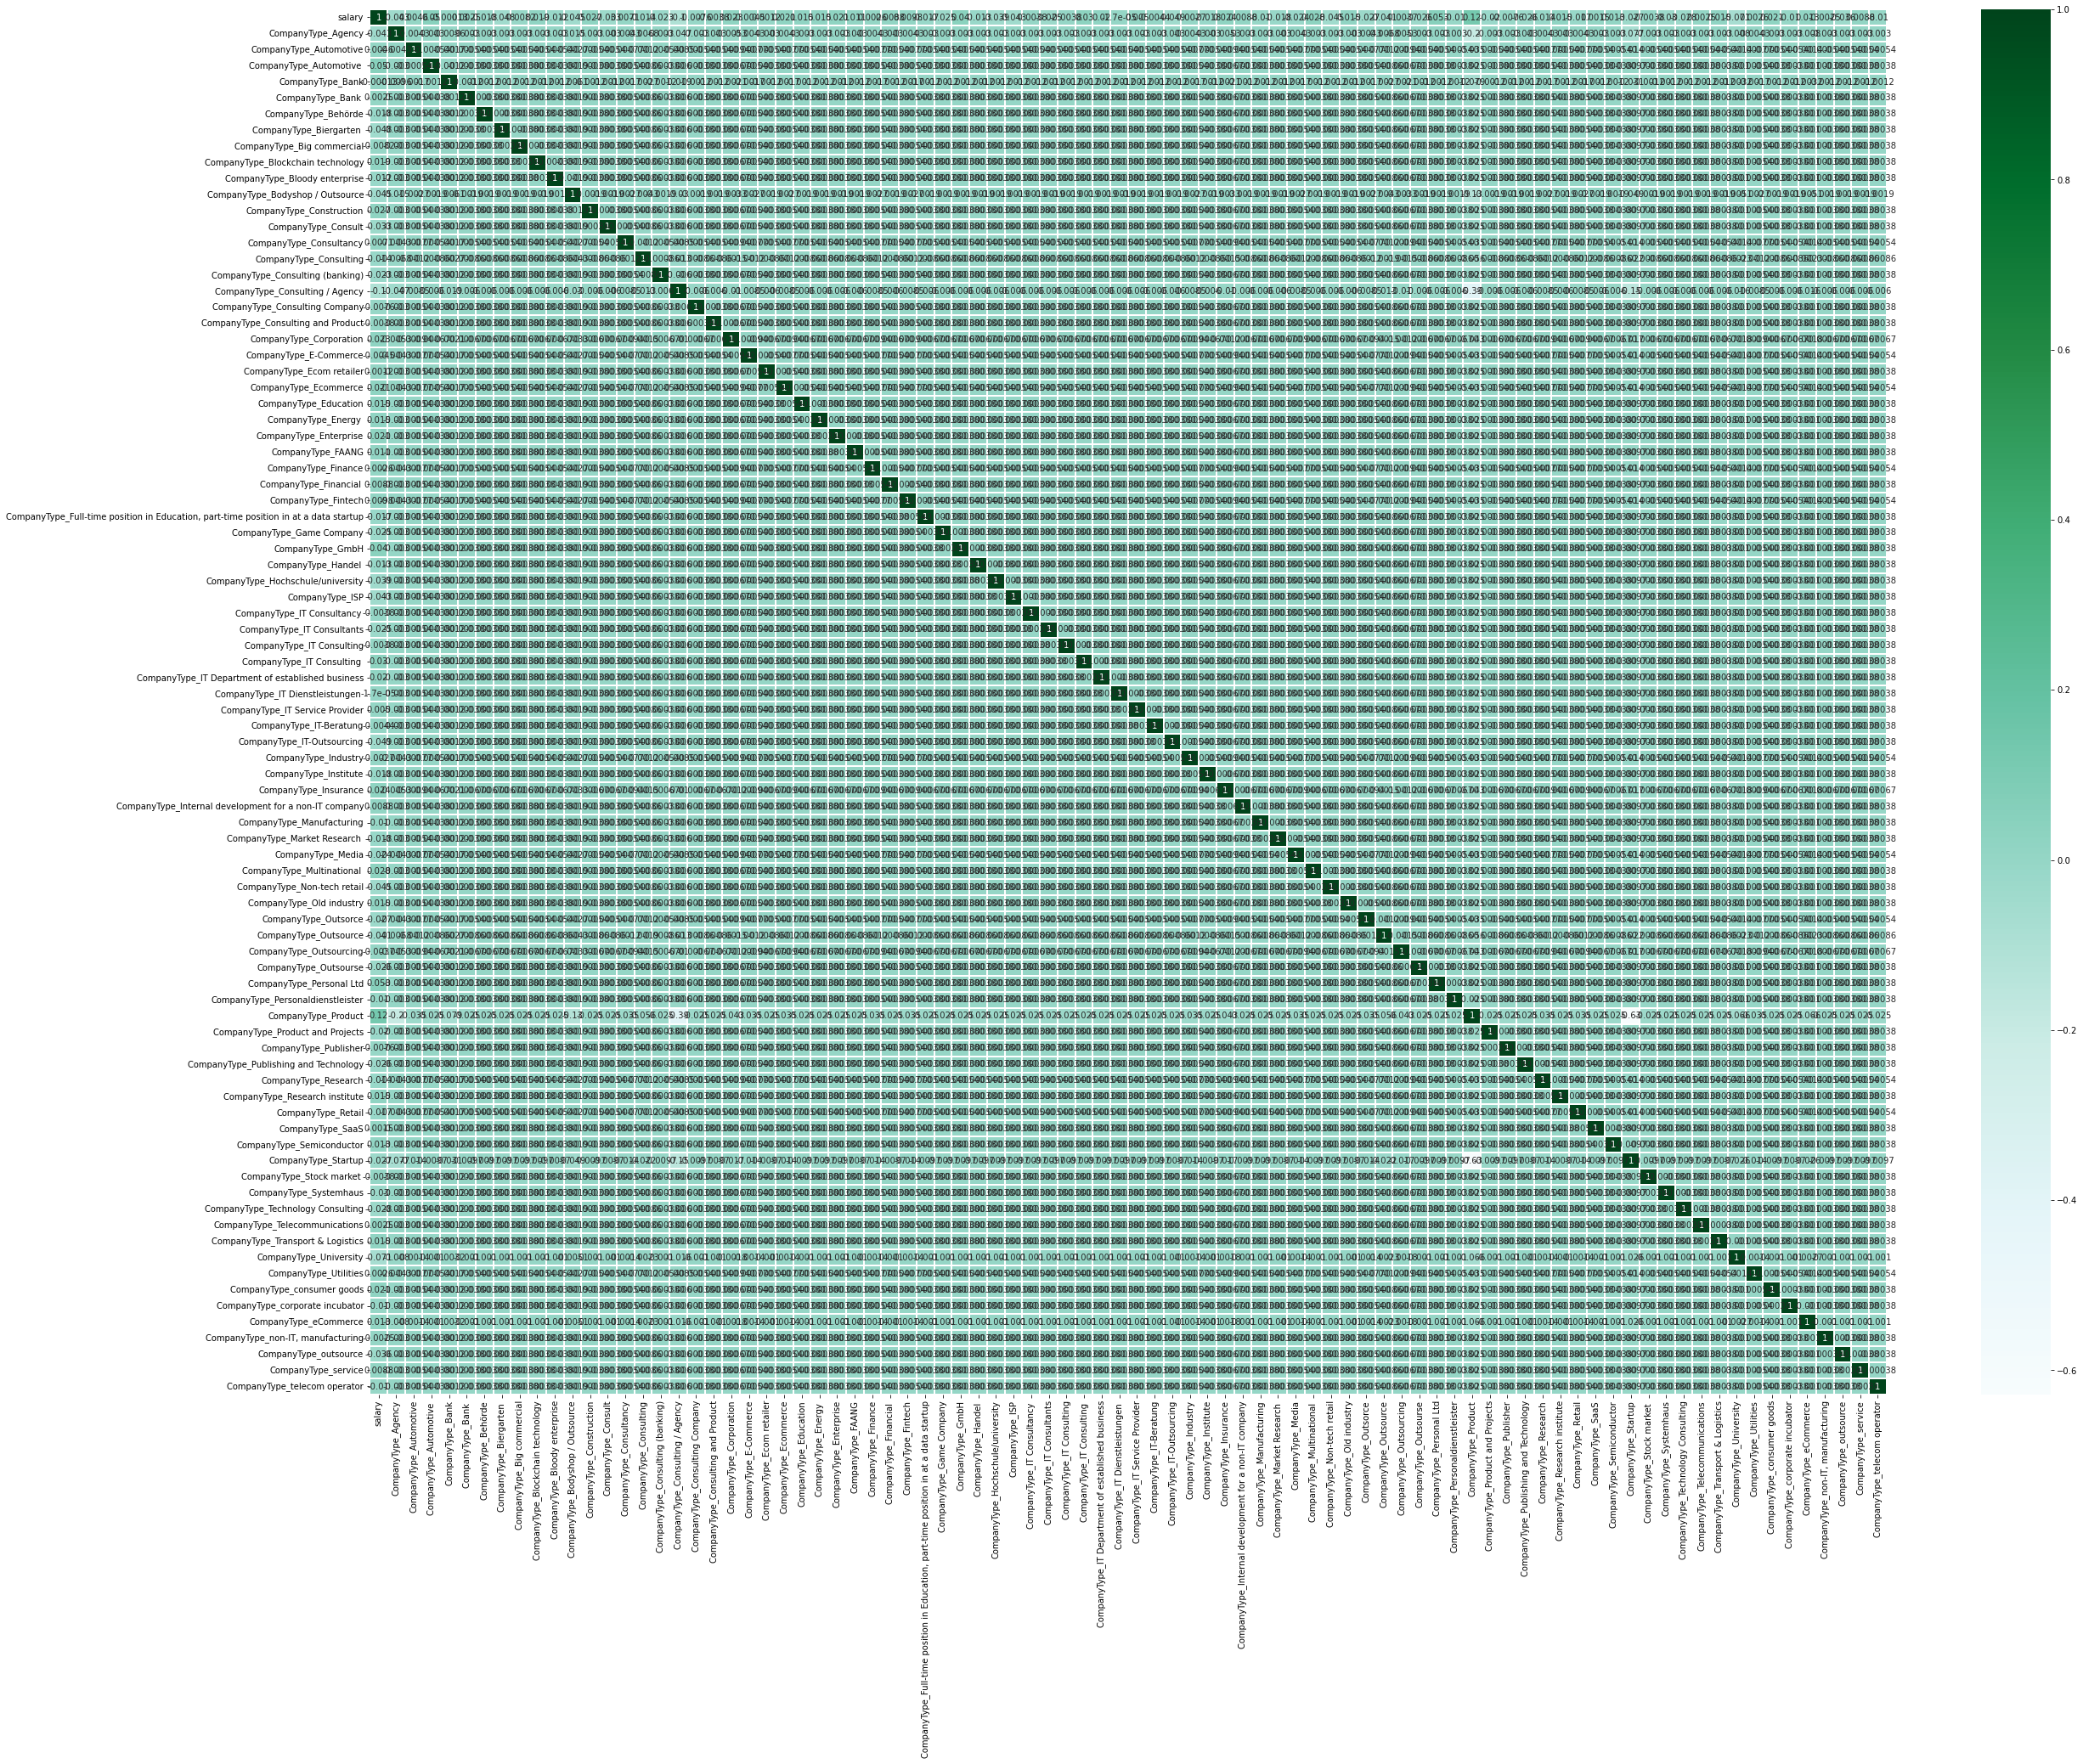

In [7]:
#Plot heatmap of Company Type correlation coefficients visible
print('Correlation between salary and the Company Type')
plt.subplots(figsize=(40,30))
sns.heatmap(df_corr_CompanyType, cmap = 'BuGn', linewidth =.005, annot = True)
print("The correlation is really small for each company type (around 0.04 - 0.01). The reason is probably because we haven't much data, but we have many differents Company Types.")

Correlation between salary and the Company Size
We have to highest correlation between salary and a Company with over 1000 employees


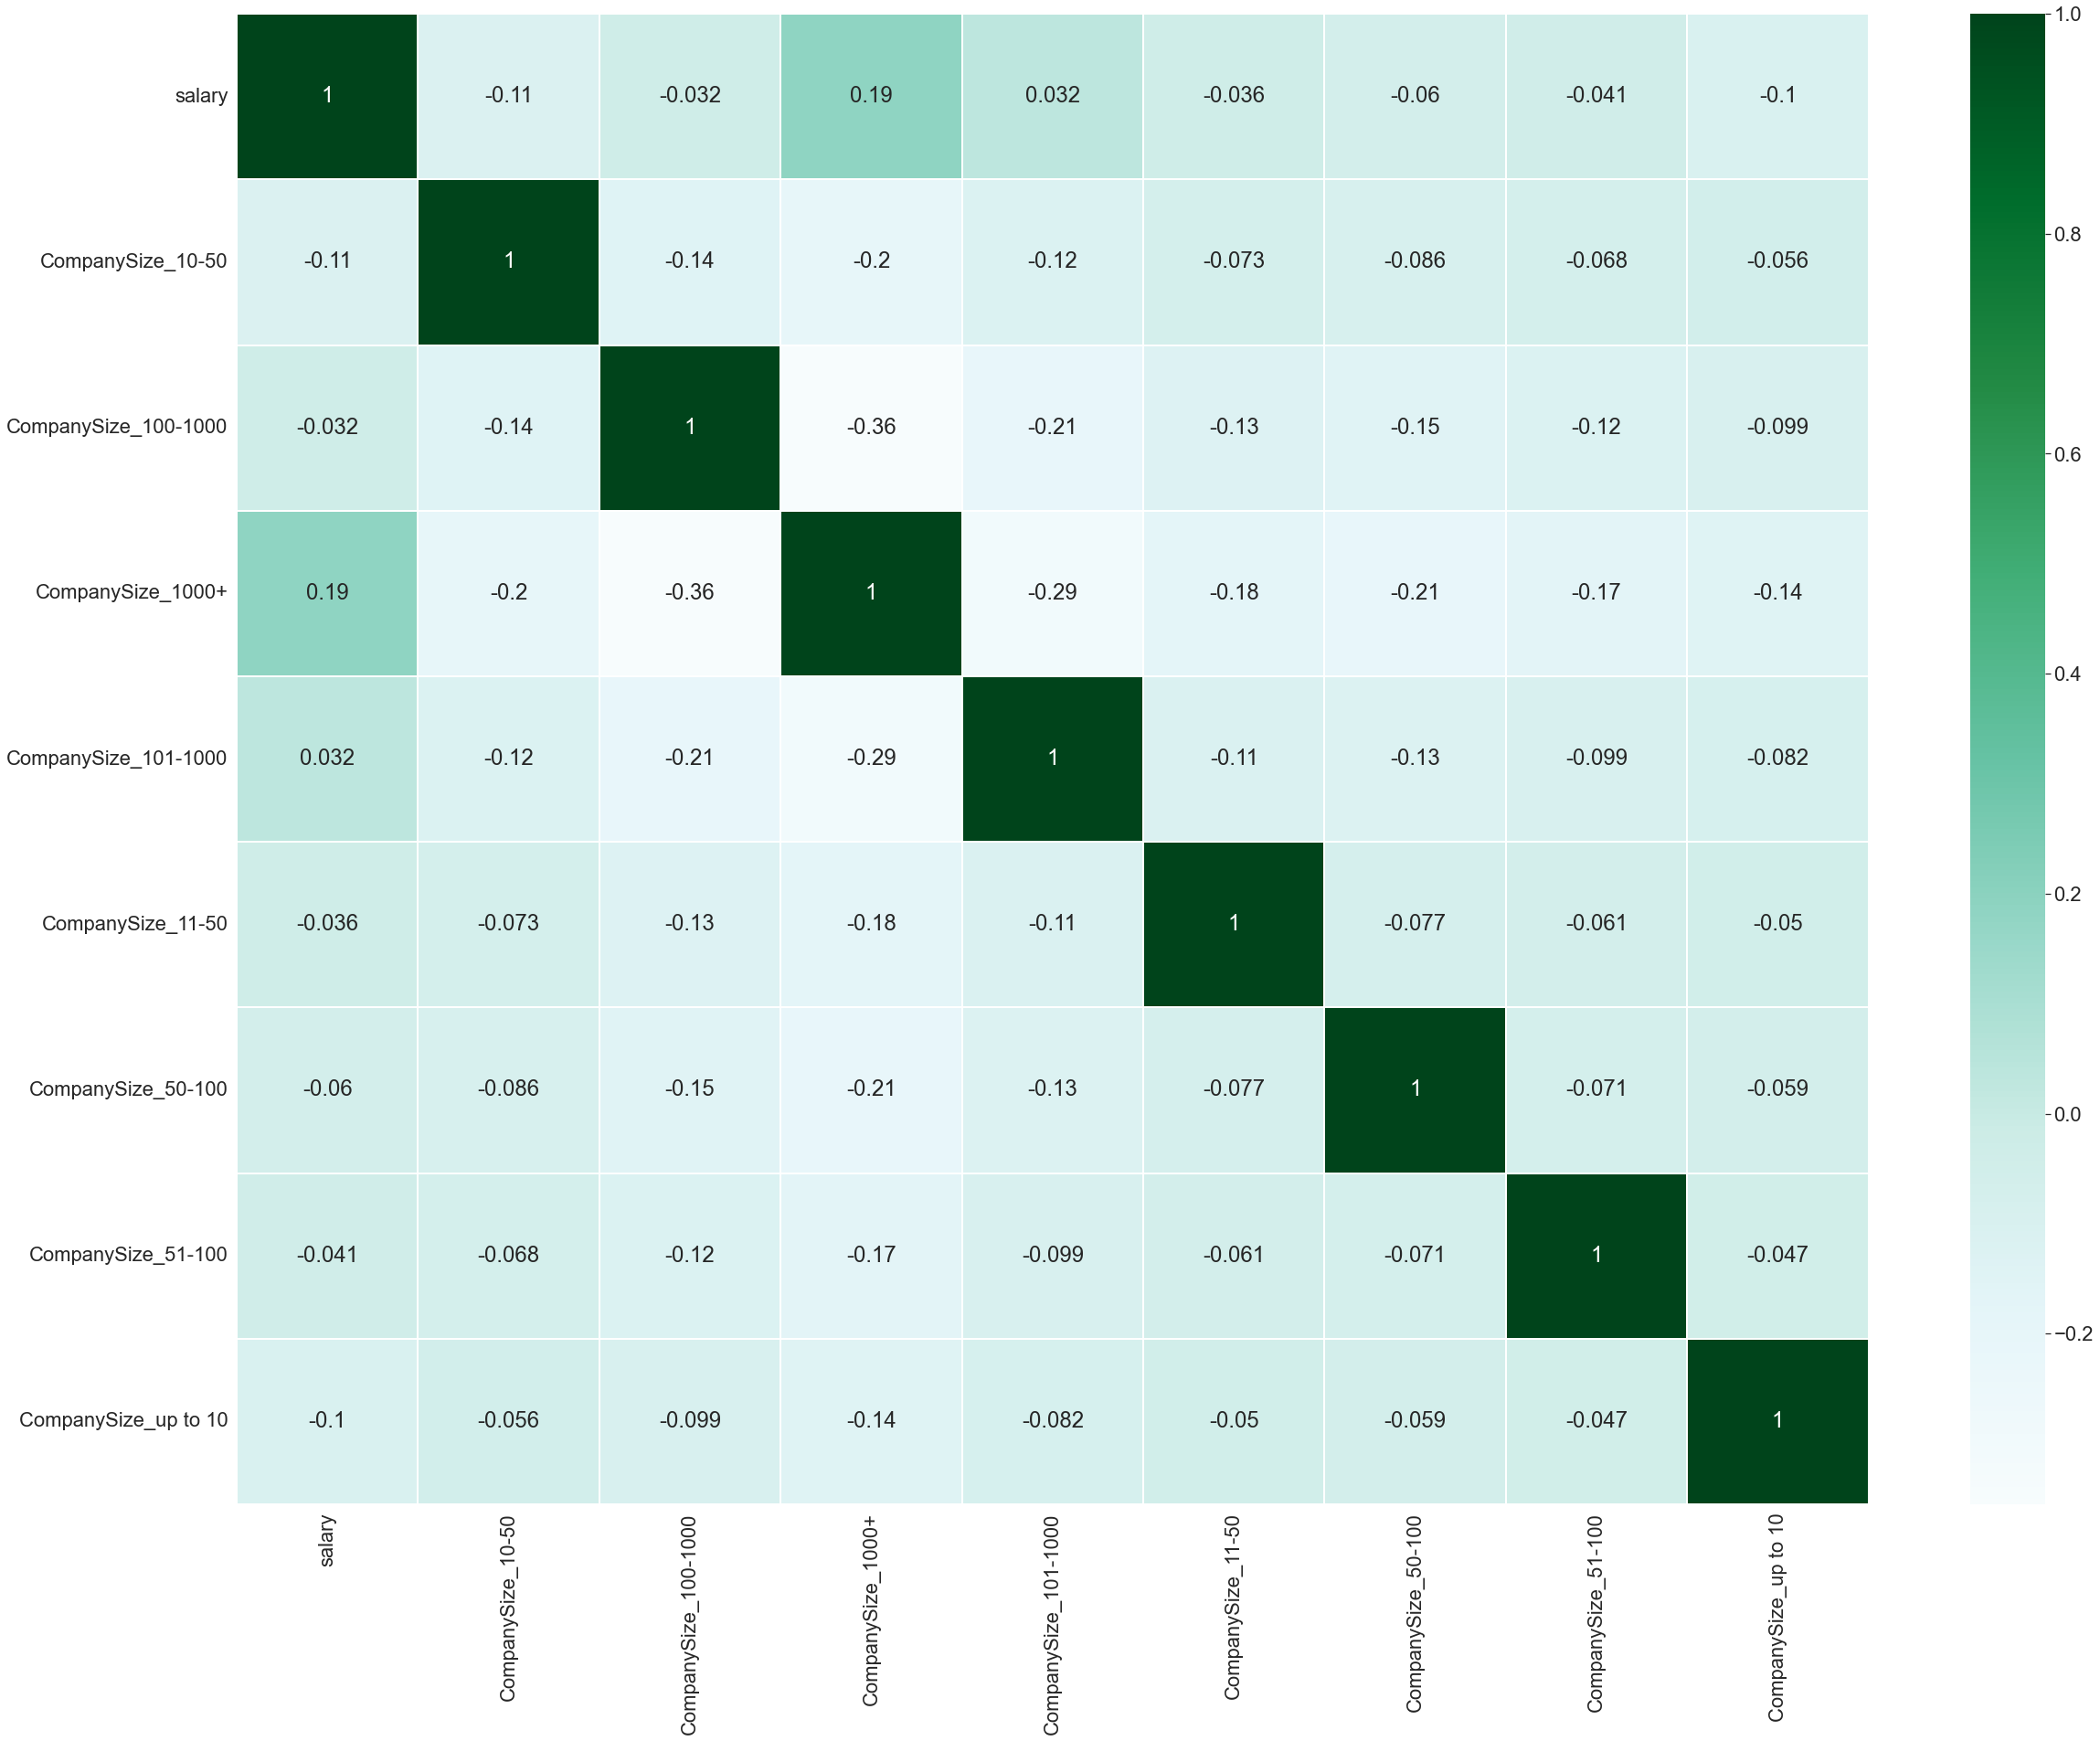

In [74]:
#Plot heatmap of Company Size with correlation coefficients visible
print('Correlation between salary and the Company Size')
plt.subplots(figsize=(40,30))
sns.heatmap(df_corr_CompanySize, cmap = 'BuGn', linewidth =.005, annot = True)
sns.set(font_scale = 2)
print ("We have to highest correlation between salary and a Company with over 1000 employees")

Correlation between salary and Age and Gender
You can see a correlation between salary and gender as well as salary and age.


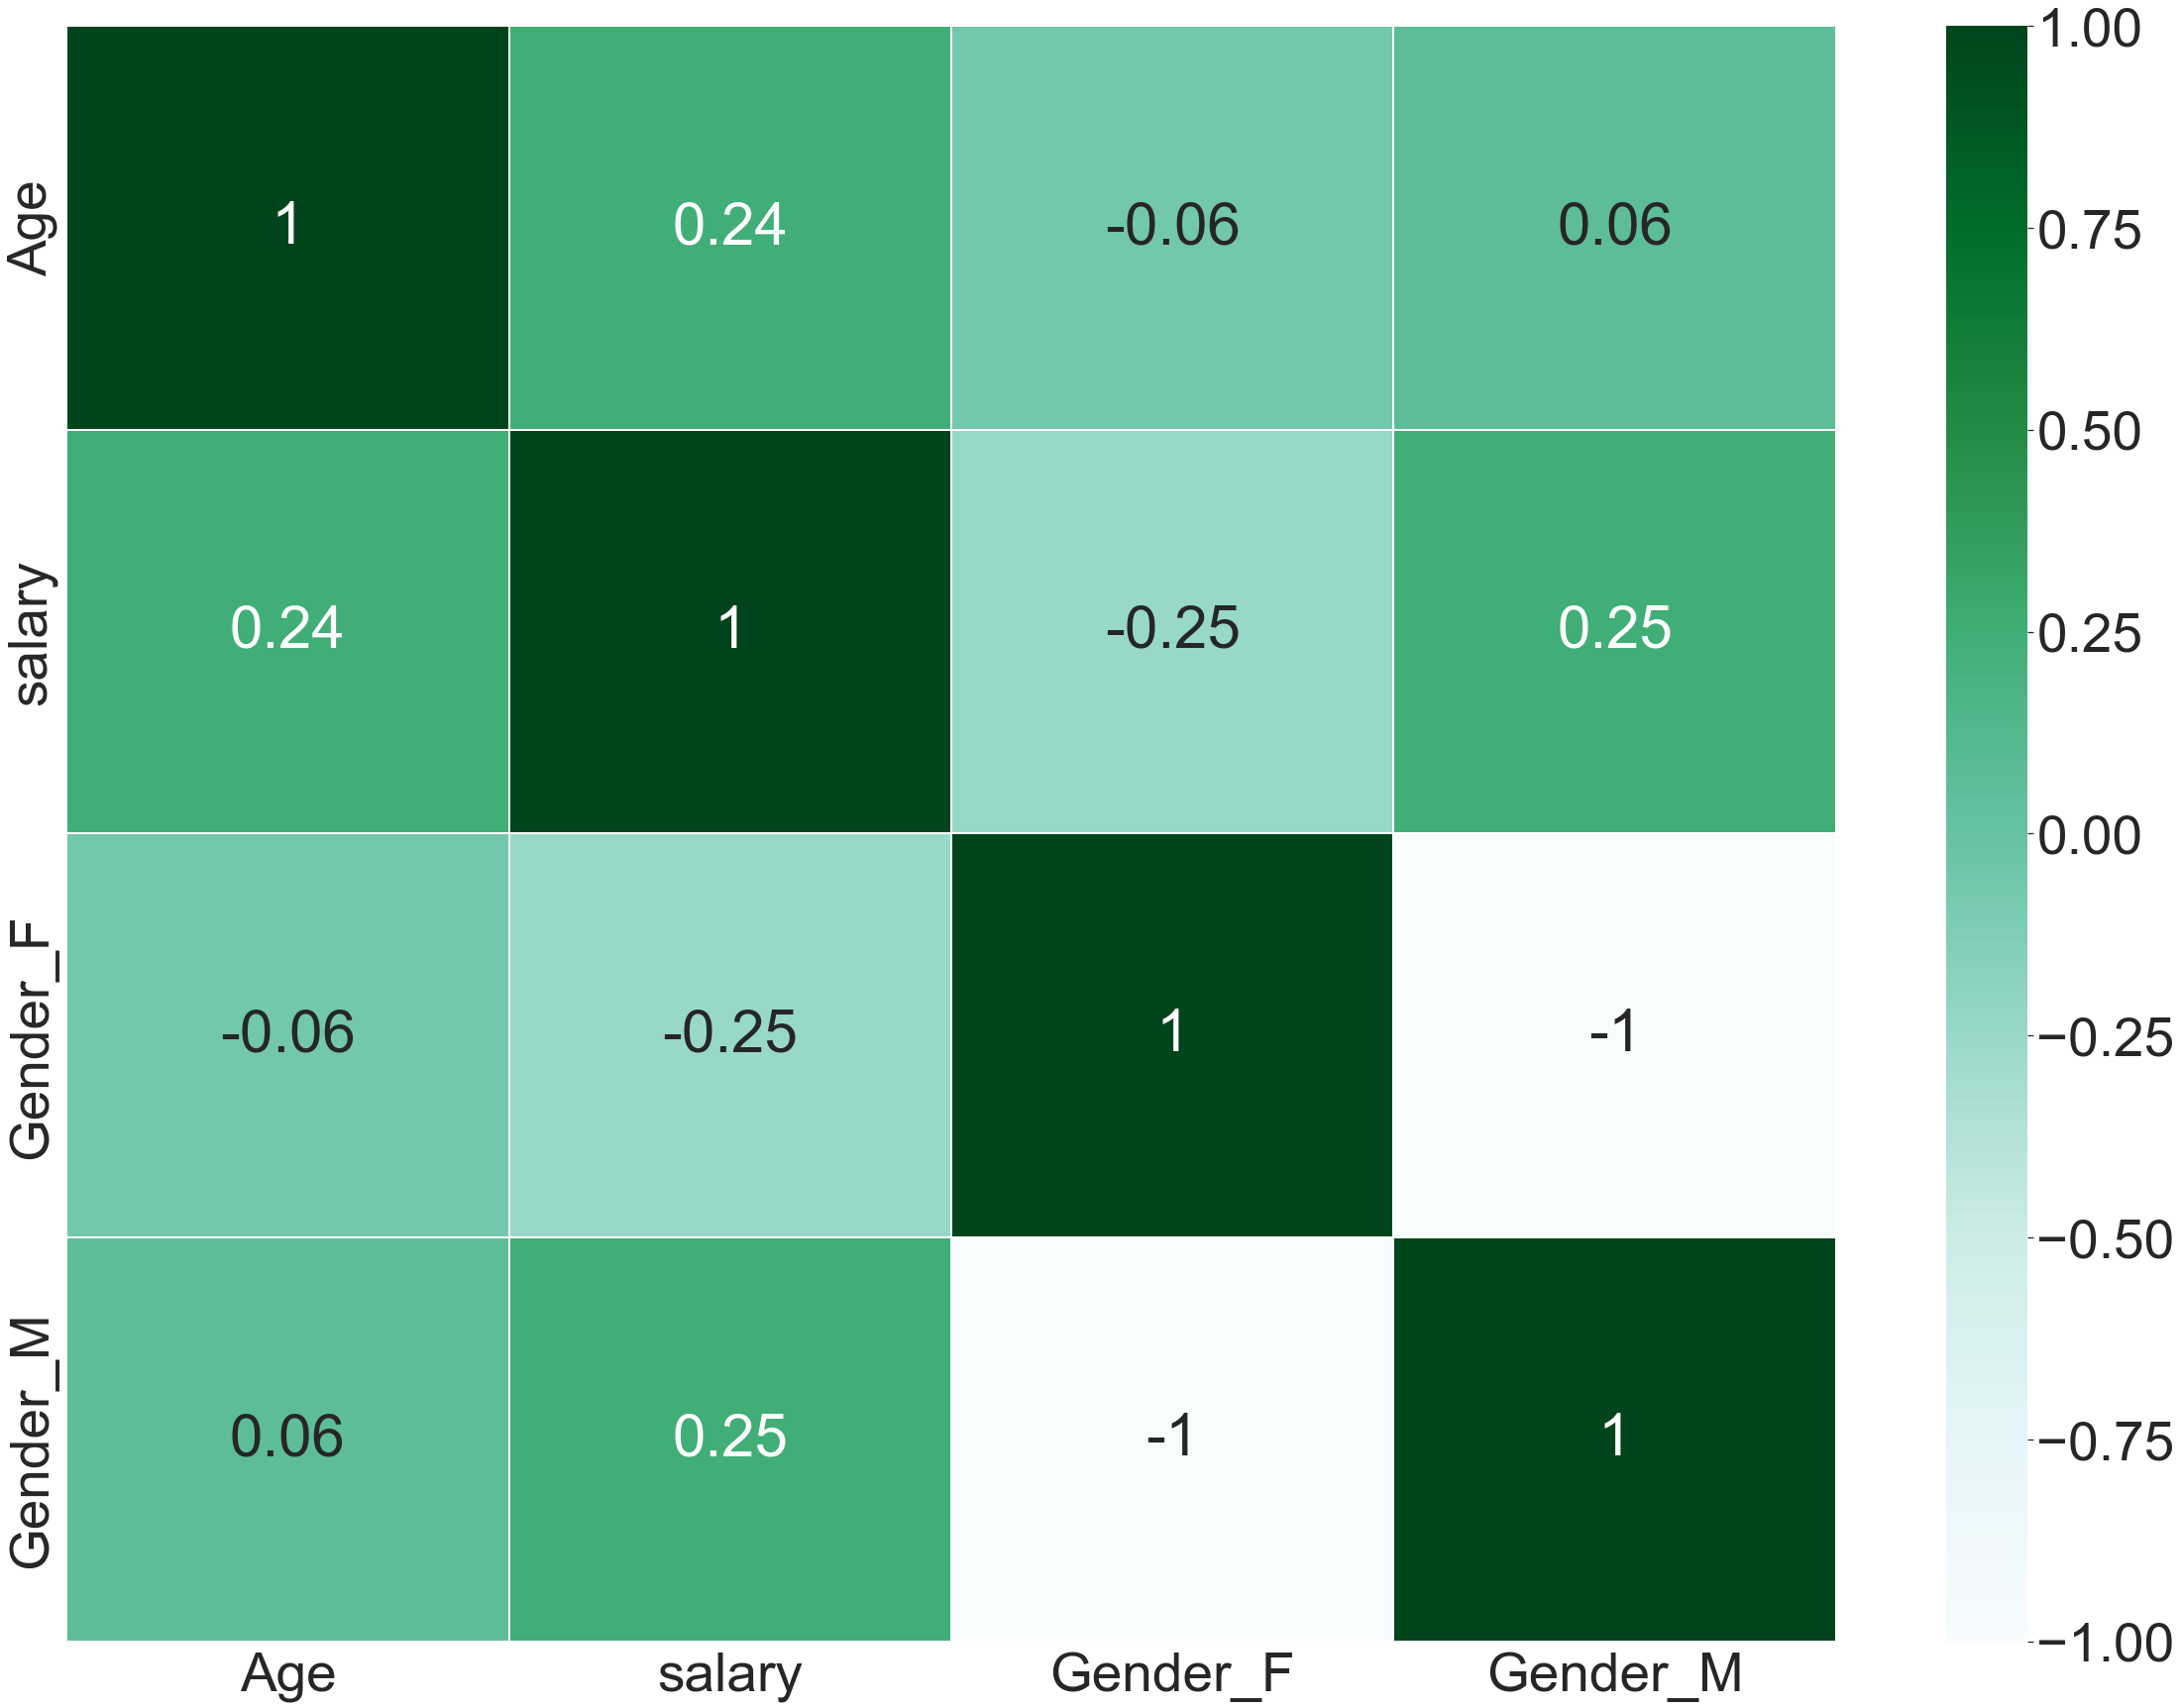

In [9]:
#Plot heatmap of age and gender with correlation coefficients visible
print('Correlation between salary and Age and Gender')
plt.subplots(figsize=(40,30))
sns.heatmap(df_corr_Age_Gender, cmap = 'BuGn', linewidth =.005, annot = True)
sns.set(font_scale = 5)
print("You can see a correlation between salary and gender as well as salary and age.")

Correlation between salary and years of experience
You can see a correlation of 0.23 between salary and years of experience.


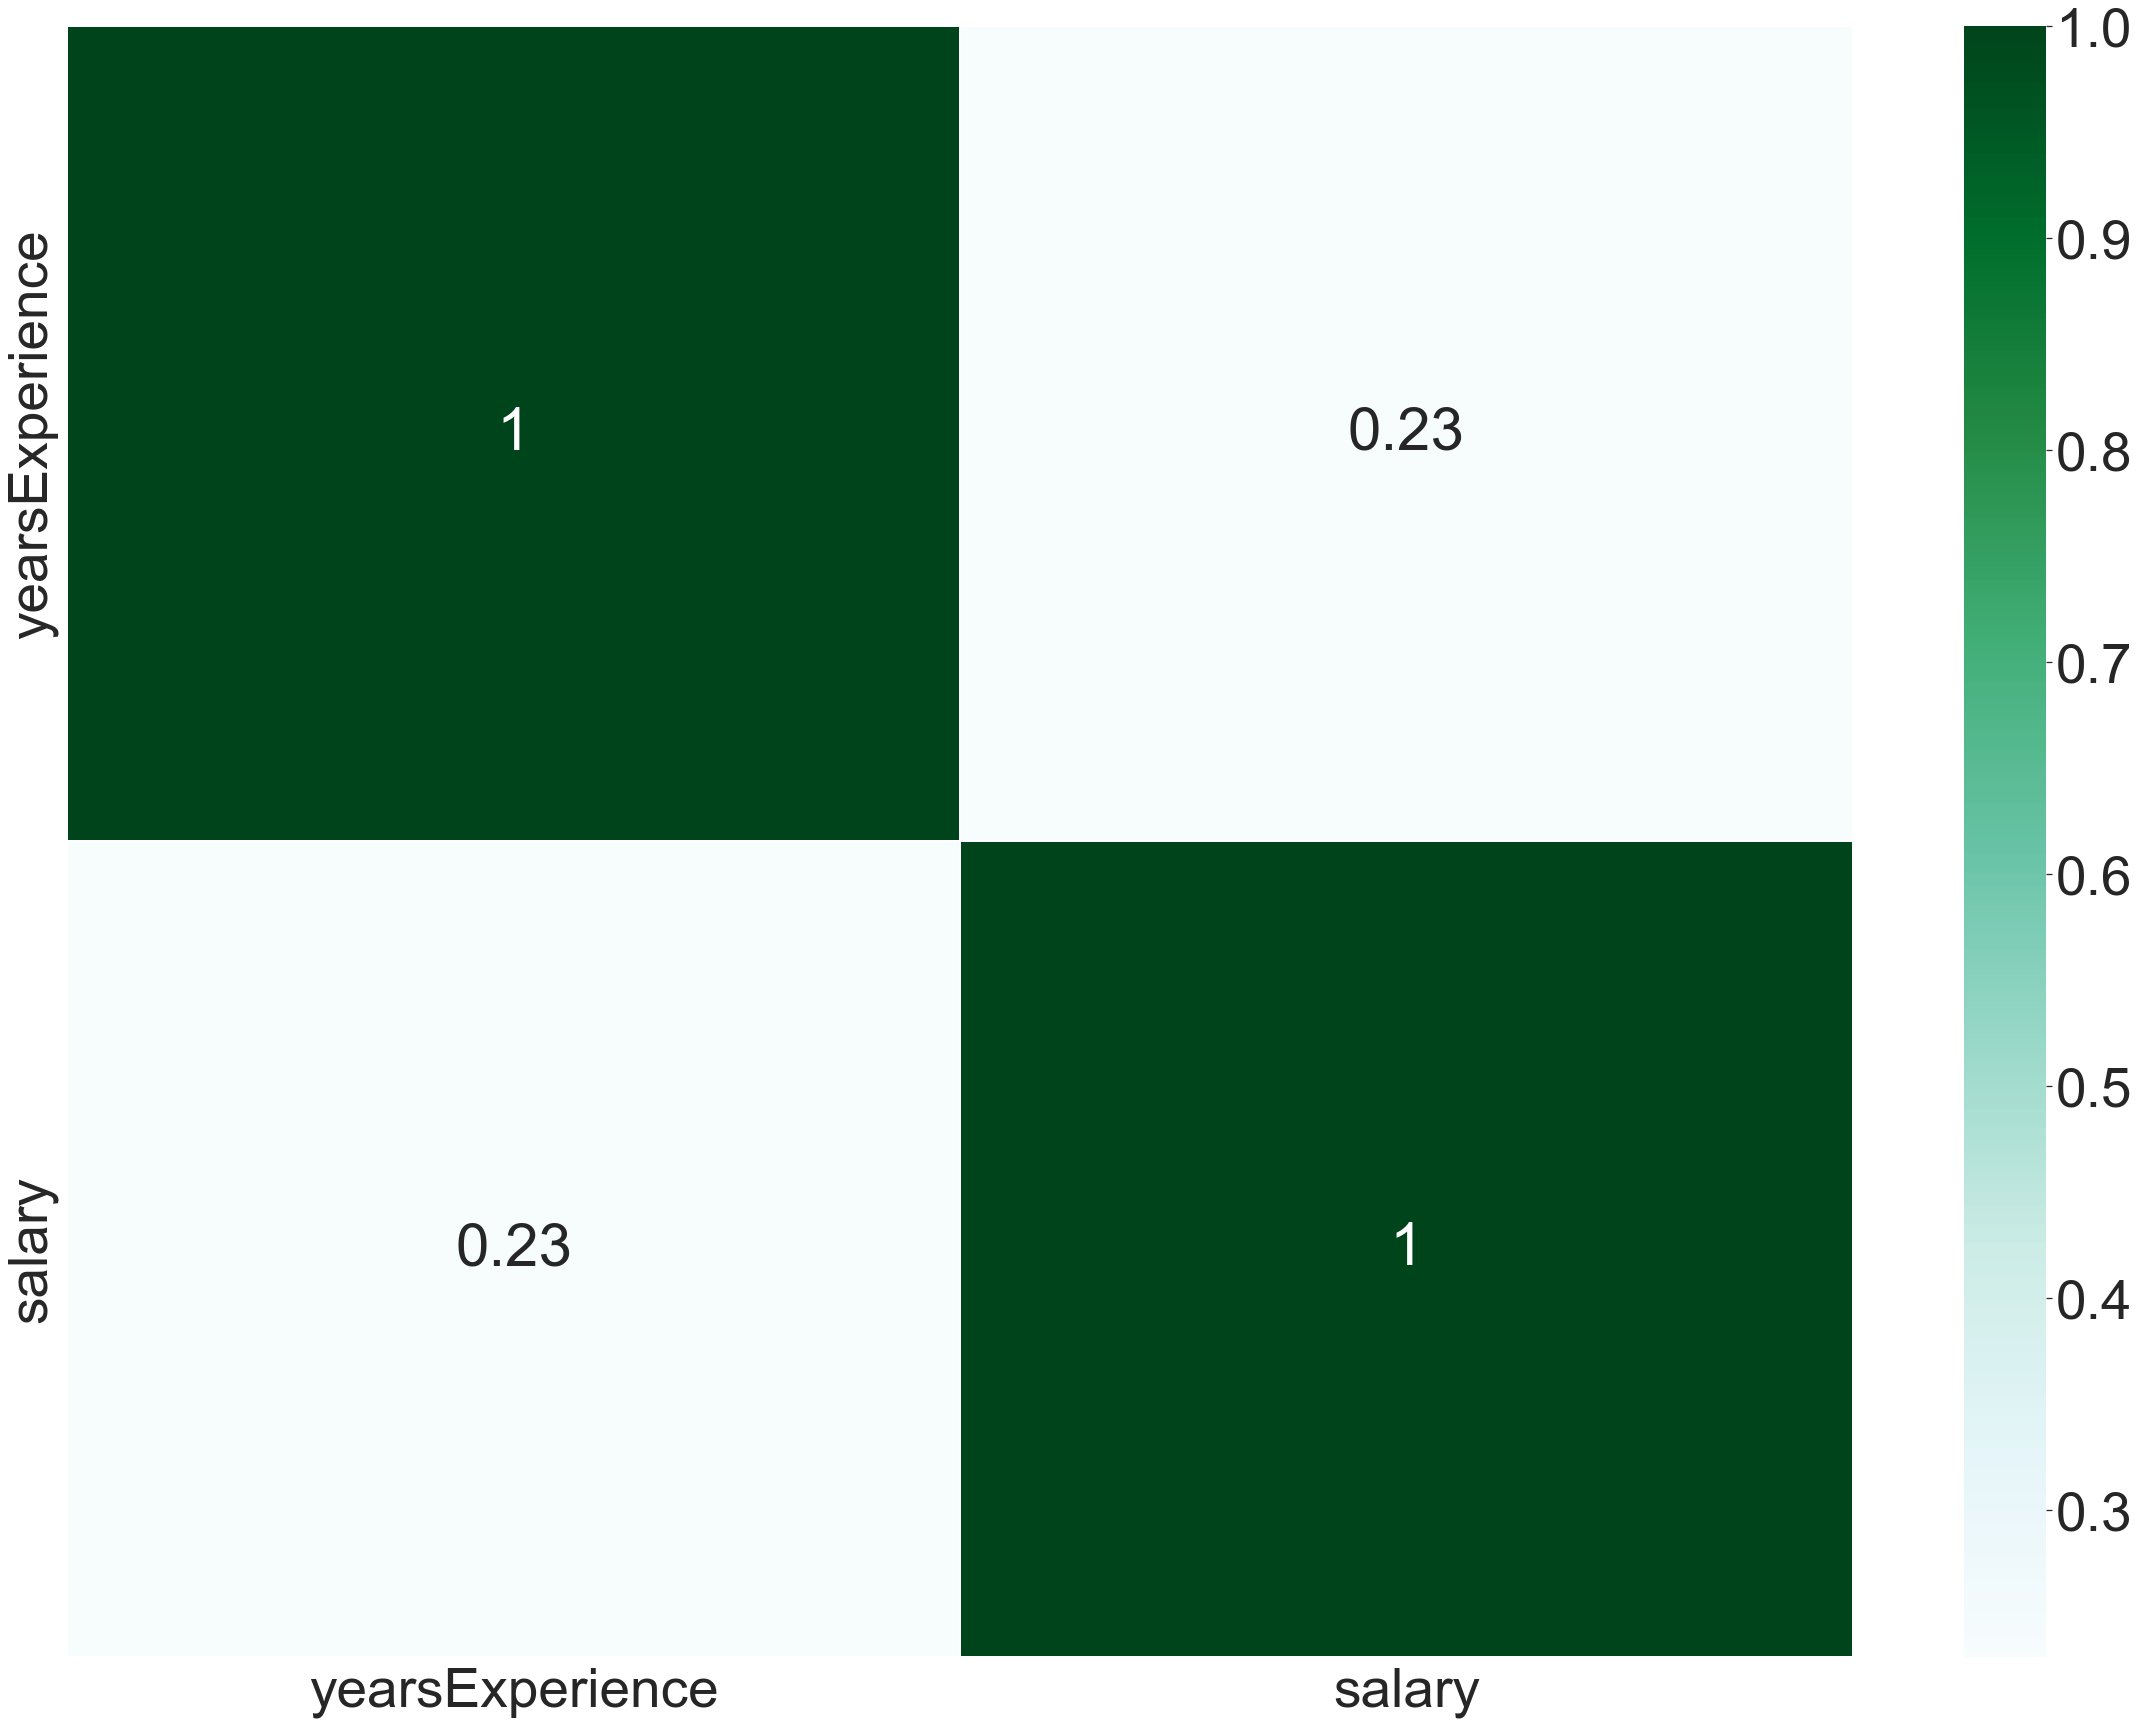

In [10]:
#Plot heatmap of years experience with correlation coefficients visible
print('Correlation between salary and years of experience')
plt.subplots(figsize=(40,30))
sns.heatmap(df_corr_yearsExperience, cmap = 'BuGn', linewidth =.005, annot = True)
sns.set(font_scale = 5)
print("You can see a correlation of 0.23 between salary and years of experience.")

Correlation between salary and the Seniority Level
You can see a correlation between salary and some Senority Levels. For example the Levels Head, Lead and Senior.


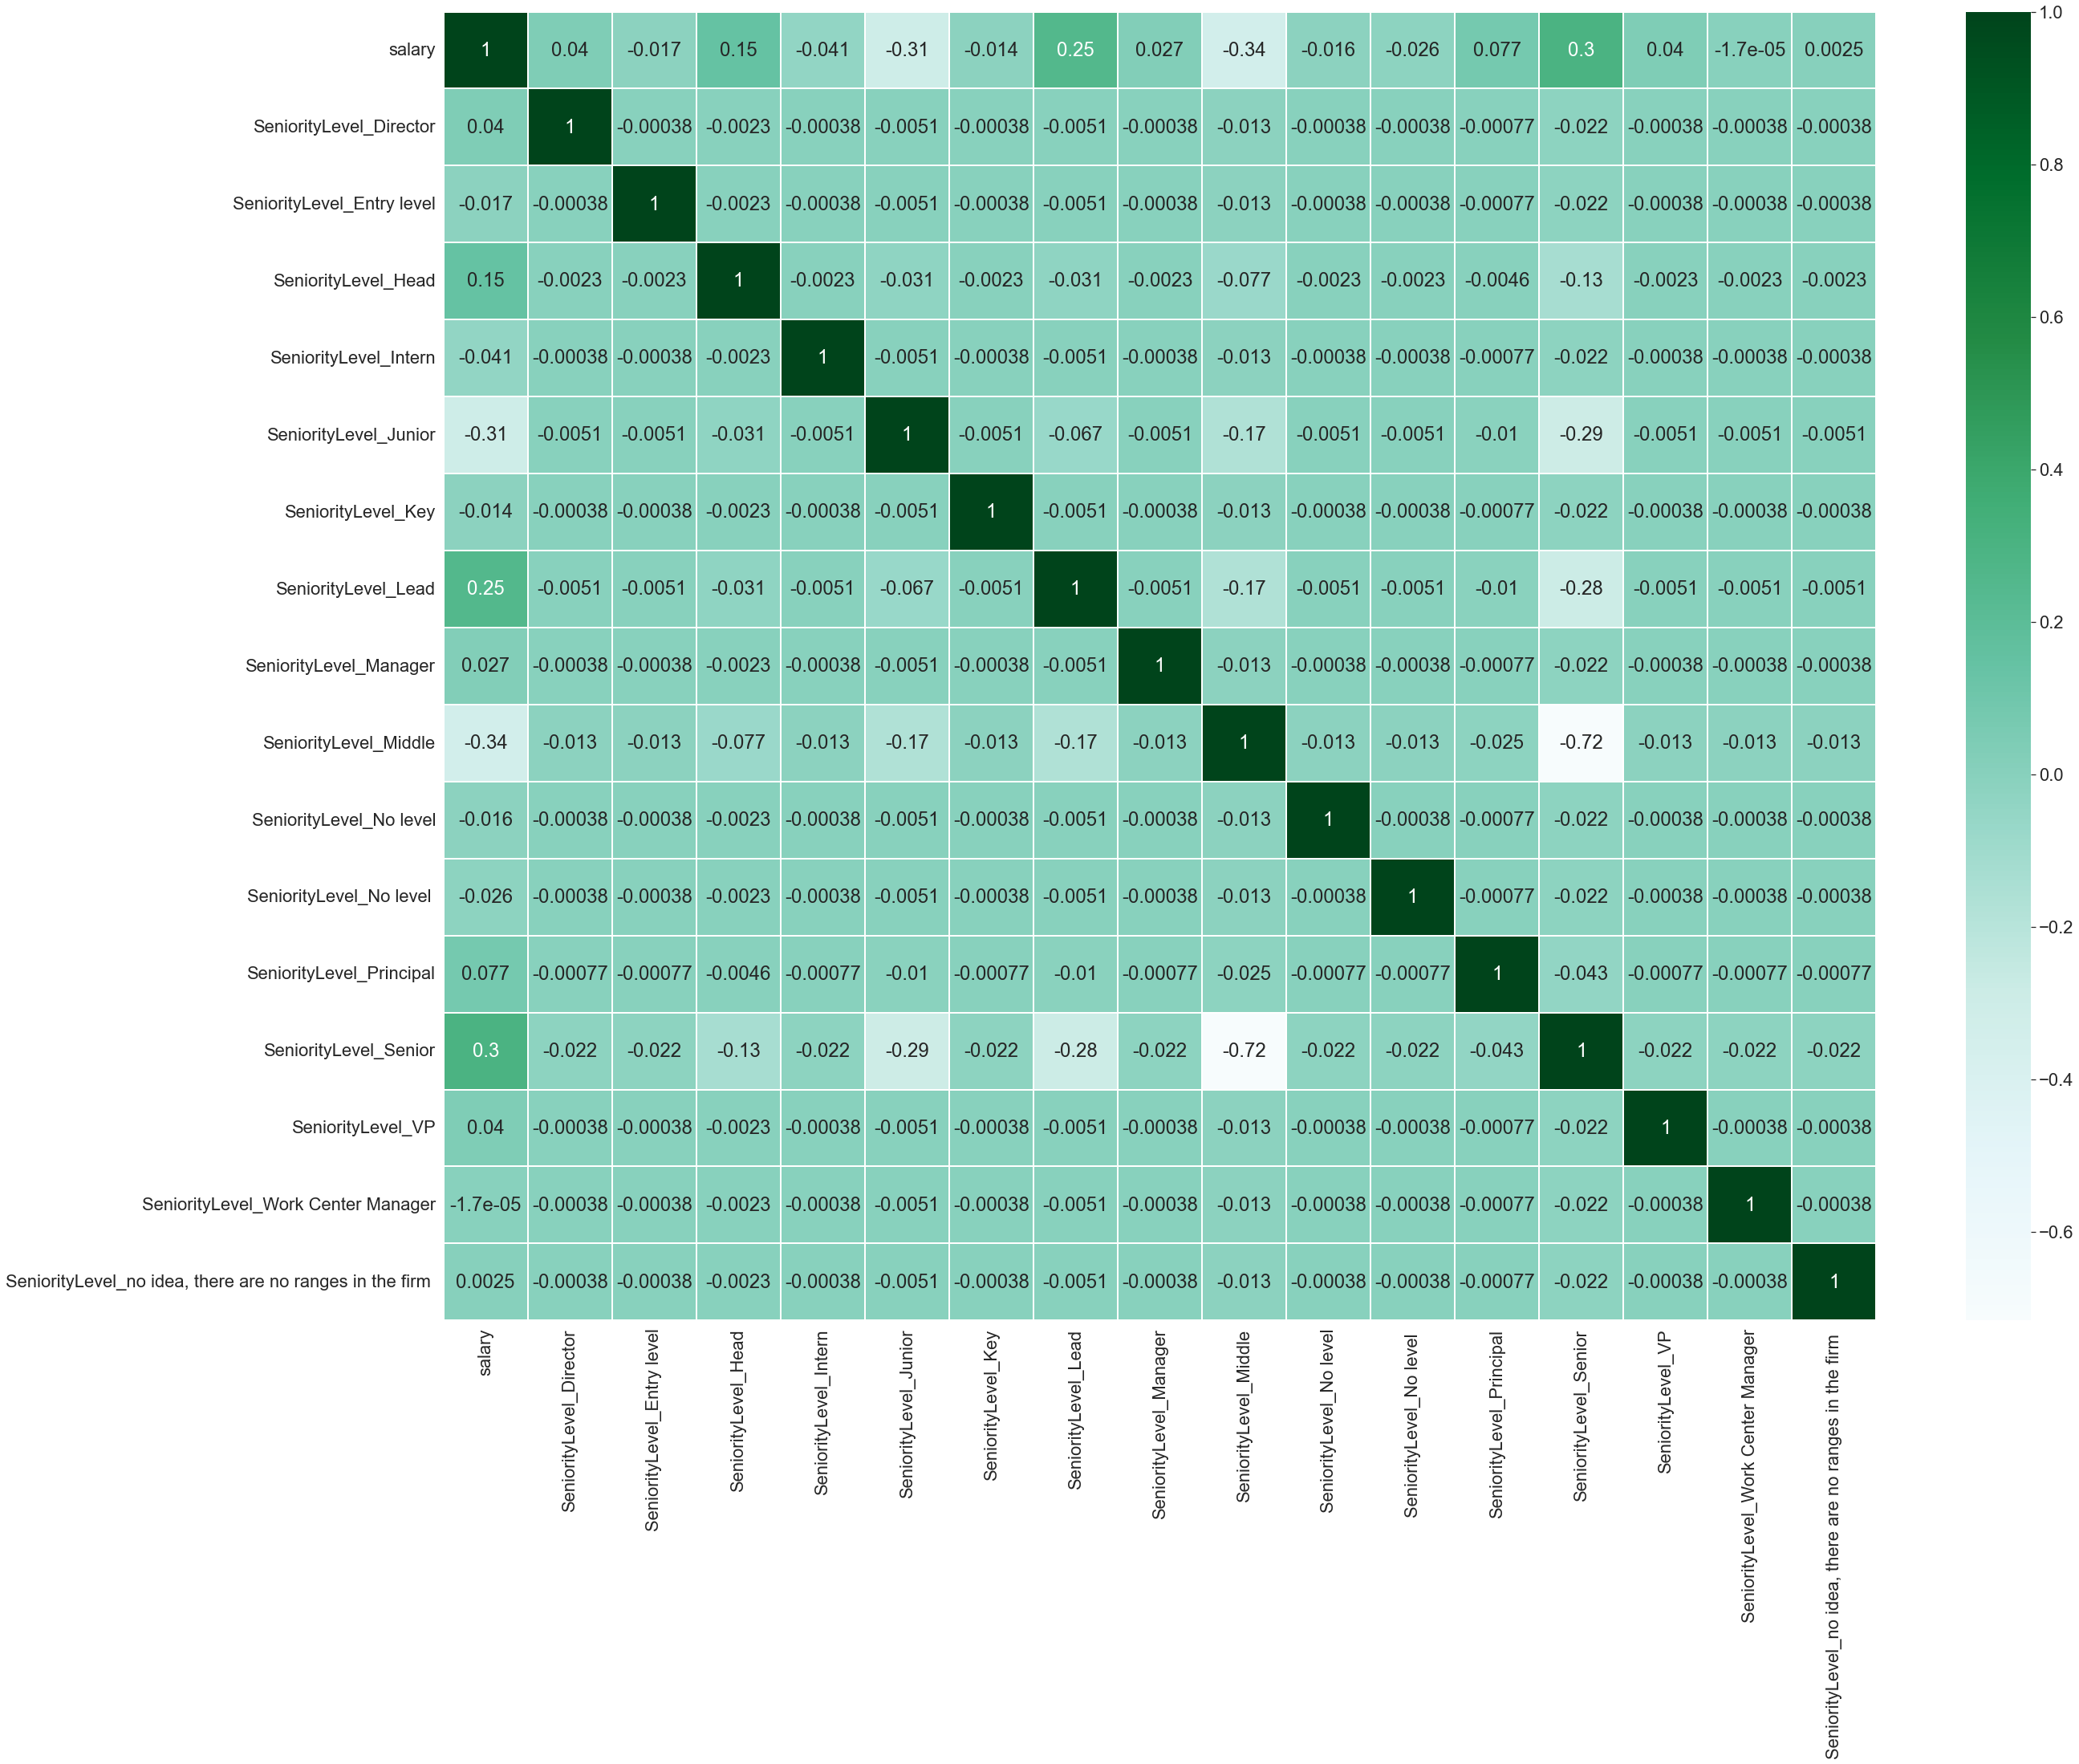

In [73]:
#Plot heatmap of seniority level with correlation coefficients visible
print('Correlation between salary and the Seniority Level')
plt.subplots(figsize=(40,30))
sns.heatmap(df_corr_SeniorityLevel, cmap = 'BuGn', linewidth =.005, annot = True)
sns.set(font_scale = 2)
print("You can see a correlation between salary and some Senority Levels. For example the Levels Head, Lead and Senior.")

Correlation between salary and Main Language
You can see a correlation between salary and the Main Language English.


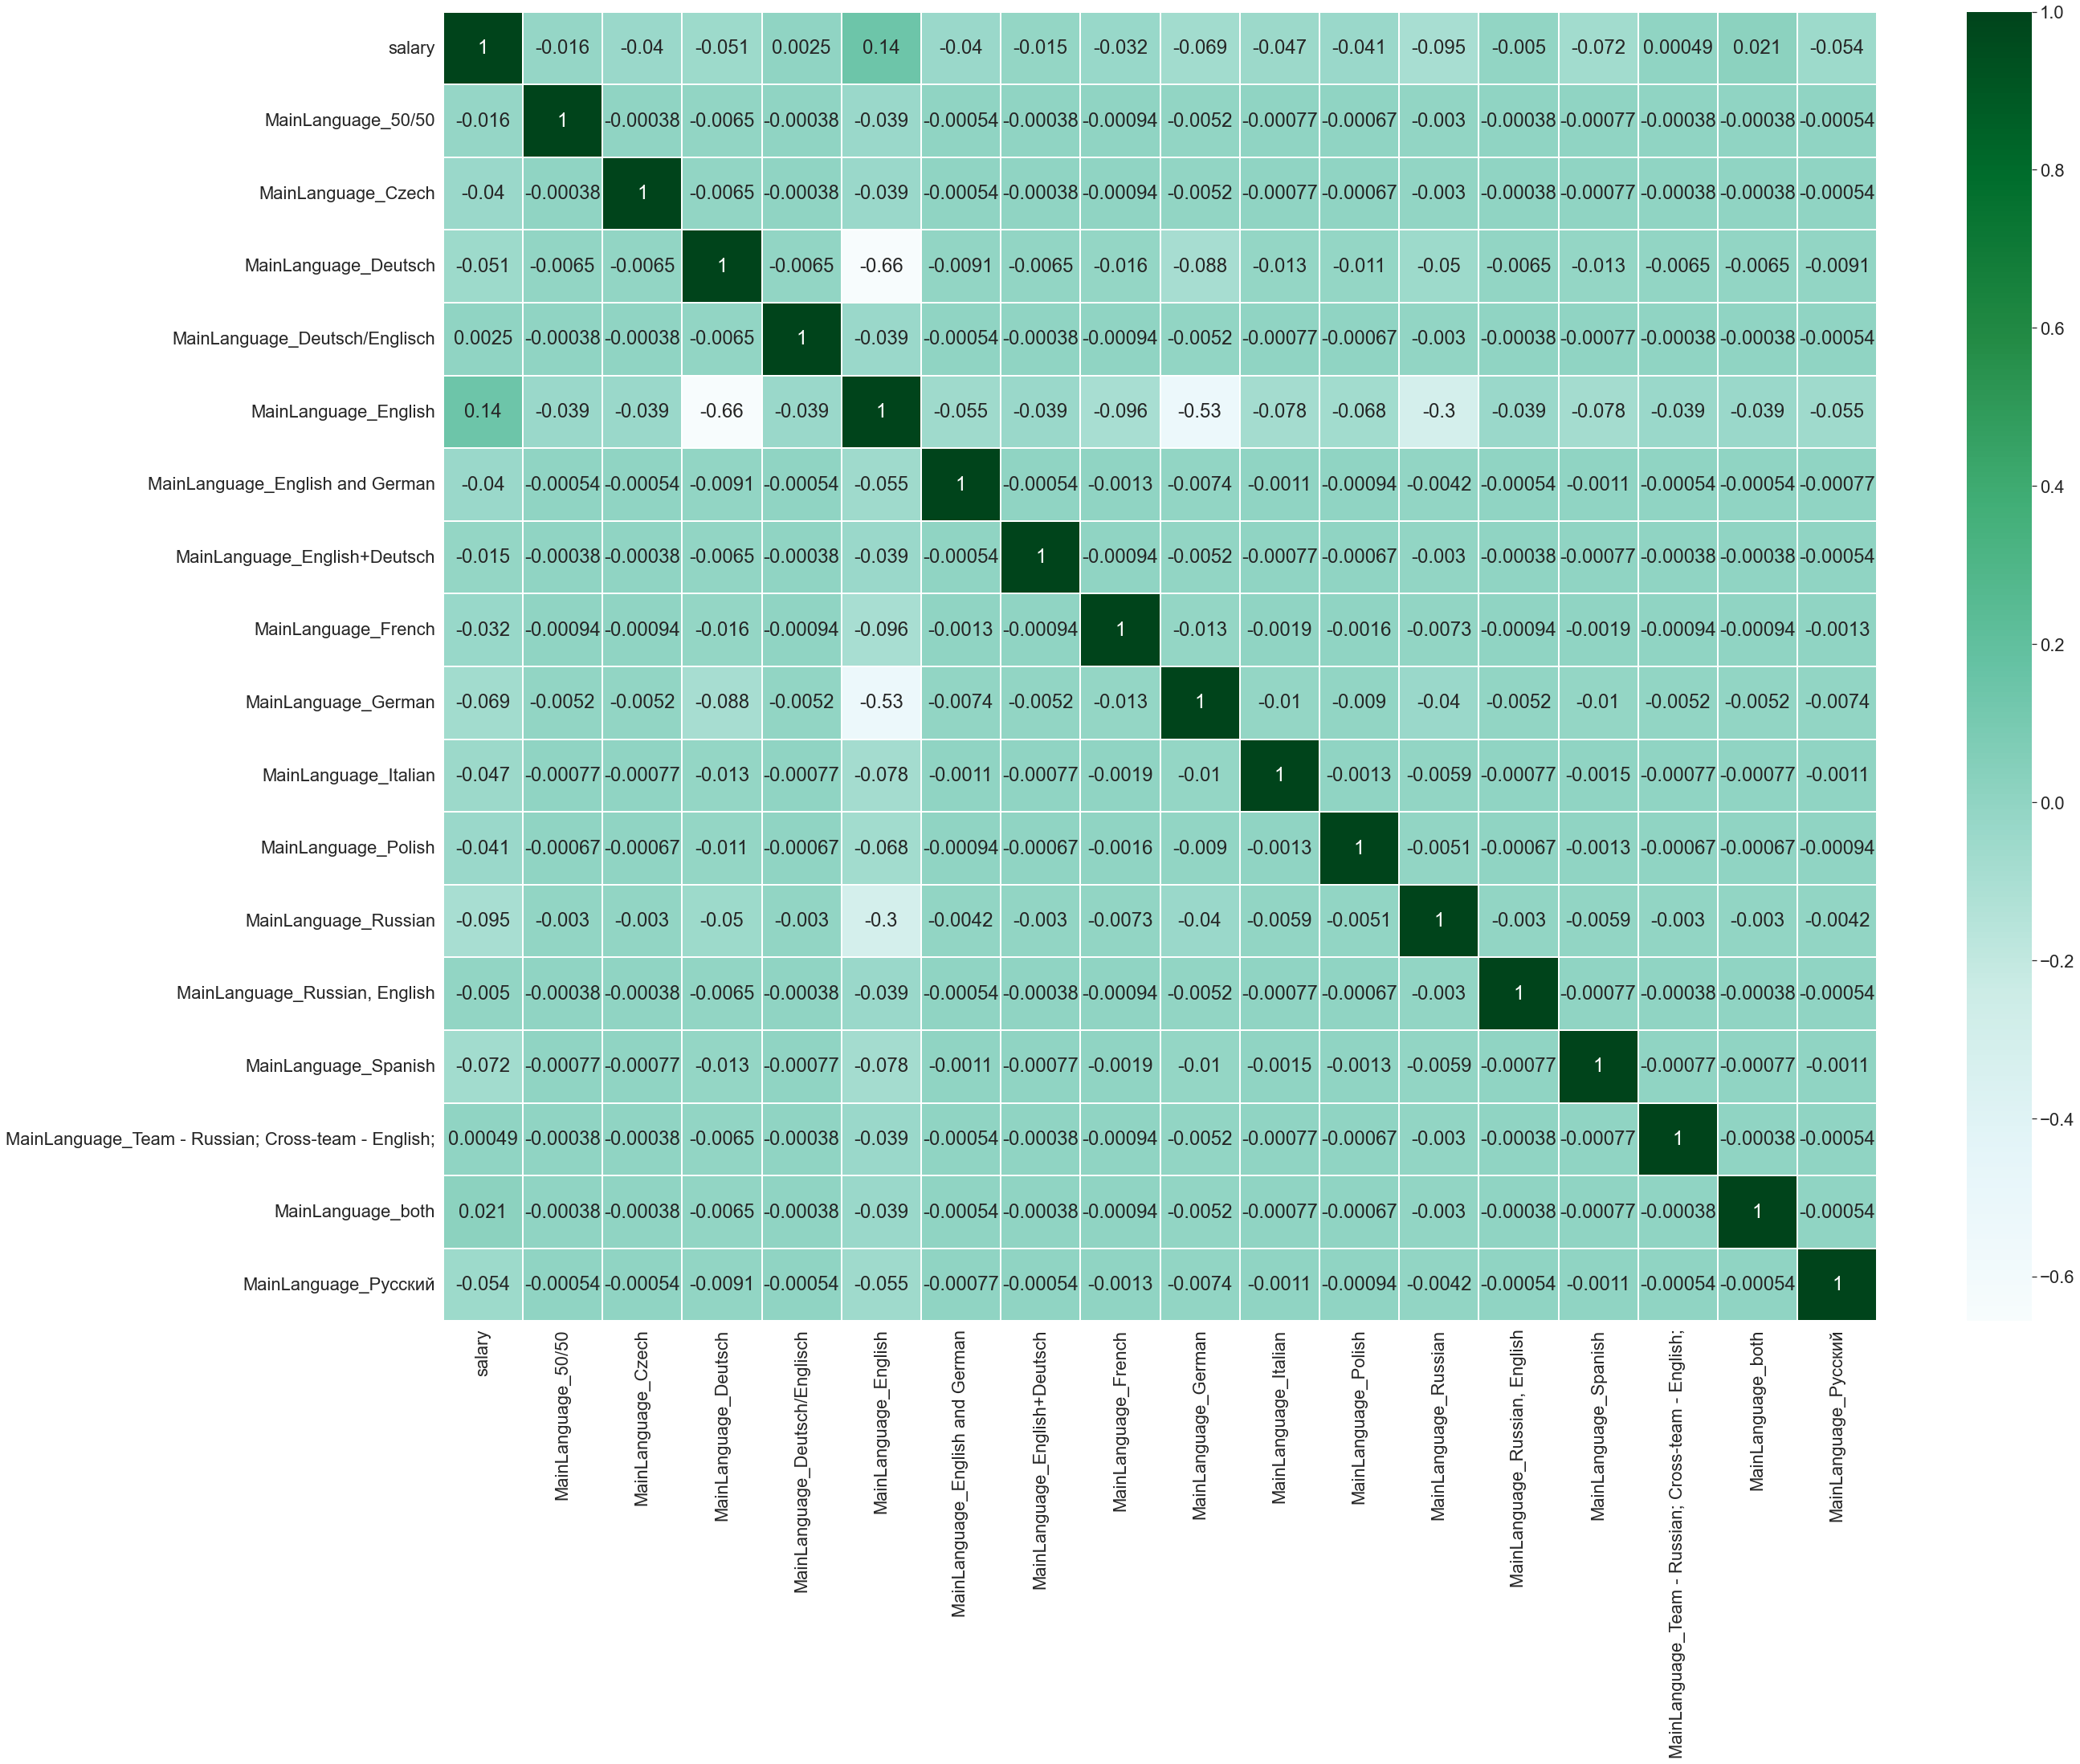

In [72]:
#Plot heatmap of main Language with correlation coefficients visible
print('Correlation between salary and Main Language')
plt.subplots(figsize=(40,30))
sns.heatmap(df_corr_MainLanguage, cmap = 'BuGn', linewidth =.005, annot = True)
sns.set(font_scale = 2)
print("You can see a correlation between salary and the Main Language English.")

#### We decide to use all features for our models, because every feature had some correlation to salary (even if they were only very small dependencies).

In [13]:
df = pd.get_dummies(df)

In [14]:
df

,Age,yearsExperience,salary,Gender_F,Gender_M,City_Aachen,City_Almere,City_Amsterdam,City_Amsterdam,City_Andernach,...,CompanyType_Transport & Logistics,CompanyType_University,CompanyType_Utilities,CompanyType_consumer goods,CompanyType_corporate incubator,CompanyType_eCommerce,"CompanyType_non-IT, manufacturing",CompanyType_outsource,CompanyType_service,CompanyType_telecom operator
0,43,11,77000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,8,65000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32,10,88000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,6,78000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39,10,69000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,31,9,70000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2599,33,10,60000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2600,39,15,110000,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2601,26,7,38350,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Models
The goal is to predict the salarys based on the feature. We will use 4 differents models and compare them to see which model will work best and give us the best results. \
The models are: linear regression, Polynomial Transformation, Ridge Regression and Random Forest

In [15]:
#Split the data and assign 'salary' to 'sal_df' and the rest of the features to 'feat_df'. 
feat_df = df[df.loc[ :, df.columns != 'salary'].columns]
sal_df = df['salary']
feat_train, feat_test, sal_train, sal_test = train_test_split(feat_df, sal_df, test_size = 0.2, random_state = 1)

In [16]:
#View inputs and outputs of training model
print ('Inputs- \n', feat_train.head)
print ('Outputs- \n', sal_train.head)

Inputs- 
 <bound method NDFrame.head of       Age  yearsExperience  Gender_F  Gender_M  City_Aachen  City_Almere  \
514    39                5         0         1            0            0   
270    28                8         1         0            0            0   
517    35               14         0         1            0            0   
1984   25                1         0         1            0            0   
615    35               10         1         0            0            0   
...   ...              ...       ...       ...          ...          ...   
960    29                2         1         0            0            0   
905    36               18         0         1            0            0   
1096   34                4         0         1            0            0   
235    36               10         0         1            0            0   
1061   40               15         1         0            0            0   

      City_Amsterdam  City_Amsterdam   City_And

First we'll use linear regression, because salary is a continious variable. \
We will use the baseline model by appling Linear Regression to feat_train and sal_train

In [17]:
#Create Linear Regression Object and fit the model
lm = LinearRegression()
lm.fit(feat_train,sal_train)
lm

LinearRegression()

In [18]:
#View coeff of Linear Regression object 
print(lm.intercept_)
print(lm.coef_)

52263.778597631535
[ 2.69723758e+02  3.93929893e+01 -3.09826542e+03  3.09826542e+03
  6.86529833e+03  1.55068847e-10  1.54903720e+04  4.51457312e+03
  1.85839802e+03 -8.16867376e+02 -1.43016228e+04  7.16173114e+03
  1.26636483e+04 -2.09183781e-11  3.56218451e+04  1.08093649e+04
  4.37862054e+04  1.70557136e+04  2.61435477e+04  1.54265825e+04
  2.87099761e+03  5.82913525e+03 -8.79474598e+03  4.02830416e+03
  1.51258042e+04 -1.75967903e+04  6.91215973e-11 -4.97325033e+03
 -6.00662339e+03  8.53437152e+03  1.63431979e+03  3.12969389e+04
  5.24825827e+03 -4.72937245e-11  4.54747351e-11  1.29222095e+04
  1.12516554e+04  1.03197146e+04  1.57462594e+04 -6.78778014e+03
  2.20944327e+04  2.15561816e+04 -9.09494702e-11  2.40638571e+03
 -2.28725738e+01  7.95960757e+03  5.72551082e+03  2.09218399e+03
  5.45696821e-11  1.38370093e+04  4.02596057e+03 -4.90574762e+03
  1.77420729e+04  1.27684046e+04 -1.02904697e+04 -7.18876434e+03
  5.31971460e+03 -1.63709046e-10 -1.61647322e+04  9.94659649e+03
  1.32

Baseline model is created and can predict the salaries. The variable y_pred_train is used to store the predictions using the training data

In [75]:
#predict salary using training data
y_pred_train = lm.predict(feat_train)
y_pred_test = lm.predict(feat_test)

#View first five predictions -
print ('First five predictions of train-data:' , y_pred_train[0:5])
print ('First five predictions of test-data:' , y_pred_test[0:5])

First five predictions of train-data: [67988.8467249  65612.03825009 69392.88486152 56823.94811584
 63845.04969222]
First five predictions of test-data: [42274.77384469 54499.75208859 68068.93902611 75395.69699637
 70872.49499253]


#### We use MAE (= errors) to evaluate the models and to compare the different models in the project.
We calculate accuracy with the percentage deviation of the predictions from the actual value. \
We decide to use MAE and not MSE so that the results are better interpreted.

In [20]:
#print MAE
print ('Mean Absolute Error of our prediction model:', mean_absolute_error(sal_train, y_pred_train))

Mean Absolute Error of our prediction model: 7752.161703574093


In [21]:
# this function is to evalute the models
def evaluate(model, predictions, feat_test, sal_test):
    #predictions = model.predict(feat_test)
    errors = abs(predictions - sal_test)
    mape = 100 * np.mean(errors / sal_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} €.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return

In [22]:
# we use the evaluate function to compute MAE (our average error) and the accuracy of the model.
evaluate(lm, y_pred_train, feat_train, sal_train)

Model Performance
Average Error: 7752.1617 €.
Accuracy = 88.10%.


In [23]:
evaluate(lm, y_pred_test, feat_test, sal_test)

Model Performance
Average Error: 8936.7533 €.
Accuracy = 86.06%.


We can see that the MAE of the test data is higher as the MAE of the trainings data

#### For each model we will plot the distribution plot, to see if the predictions match the real salary values

In [24]:
# this function is for plotting
def dis_data(Rfunction, Bfunction, Rname, Bname, title):
    plt.figure(figsize=(10,6))
    ax1 = sns.distplot(Rfunction, hist = False, color="#72f49a",label='original', )
    ax1 = sns.distplot(Bfunction, hist = False, color='#47A5F3', label='prediction')
    sns.set_style("darkgrid")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()
    plt.close()  

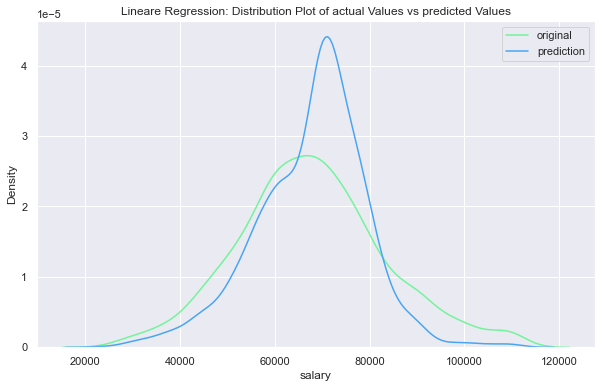

In [25]:
# distribution plot 
title = 'Lineare Regression: Distribution Plot of actual Values vs predicted Values'
dis_data(sal_train, y_pred_train, 'Actual Values(train data)', 'Predicted Values(train data)', title)

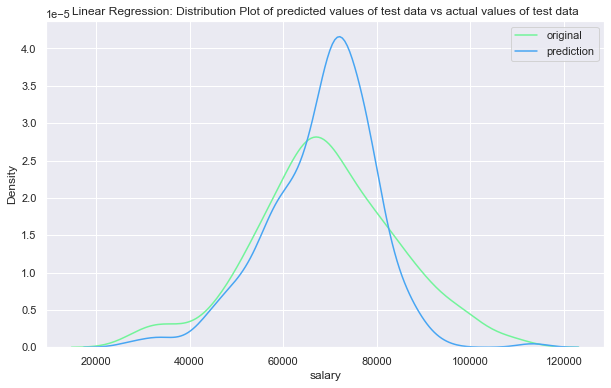

In [26]:
# Distribution plot 
Title = 'Linear Regression: Distribution Plot of predicted values of test data vs actual values of test data'
dis_data(sal_test, y_pred_test, 'Actual Values(test)', 'Predicted Values(test)', title = Title)

Our predictions plot doesn't match the real value plot too good. \
We want to improve our model and try to reduce the MAE.
#### Next model: Apply Polynomial Transformation

In [27]:
# check shape and features od training + test daten before applying model

print ('Number of training samples:', feat_train.shape, '\n with the features:', feat_train.columns )
print ('Number of testing samples:', feat_test.shape, '\n with the features:', feat_test.columns)
print ('Number of training salaries:', sal_train.shape)
print ('Number of testing salaries:', sal_test.shape )

Number of training samples: (2082, 287) 
 with the features: Index(['Age', 'yearsExperience', 'Gender_F', 'Gender_M', 'City_Aachen',
       'City_Almere', 'City_Amsterdam', 'City_Amsterdam ', 'City_Andernach',
       'City_Ansbach',
       ...
       'CompanyType_Transport & Logistics', 'CompanyType_University',
       'CompanyType_Utilities', 'CompanyType_consumer goods',
       'CompanyType_corporate incubator', 'CompanyType_eCommerce',
       'CompanyType_non-IT, manufacturing', 'CompanyType_outsource',
       'CompanyType_service', 'CompanyType_telecom operator'],
      dtype='object', length=287)
Number of testing samples: (521, 287) 
 with the features: Index(['Age', 'yearsExperience', 'Gender_F', 'Gender_M', 'City_Aachen',
       'City_Almere', 'City_Amsterdam', 'City_Amsterdam ', 'City_Andernach',
       'City_Ansbach',
       ...
       'CompanyType_Transport & Logistics', 'CompanyType_University',
       'CompanyType_Utilities', 'CompanyType_consumer goods',
       'CompanyTy

#### we apply Polynomial Features to our Linear Regression and we'll se if the MAE changes

In [28]:
# Fit and transform the variables with 2nd order polynomial
pr = PolynomialFeatures(2)
feat_train_pr = pr.fit_transform(feat_train)
feat_test_pr = pr.fit_transform(feat_test)
pr

PolynomialFeatures()

In [29]:
# Create a new model using Polynomial Transformation 
poly = LinearRegression()
poly.fit(feat_train_pr, sal_train)

LinearRegression()

In [30]:
# make predictions and view first five predictions on train data - 
y_pred_pr = poly.predict(feat_train_pr)
y_pred_prtest = poly.predict(feat_test_pr)

In [31]:
# MAE and accuracy of training data - 
evaluate(poly, y_pred_pr, feat_train, sal_train)

Model Performance
Average Error: 5777.8281 €.
Accuracy = 91.36%.


In [32]:
# MAE and accuracy of test data -
evaluate(poly, y_pred_prtest, feat_test, sal_test)

Model Performance
Average Error: 11351.5377 €.
Accuracy = 81.20%.


#### We can see that the MAE of the training data is ~ 2000 € lower. But is also 2000 € higher by the test data

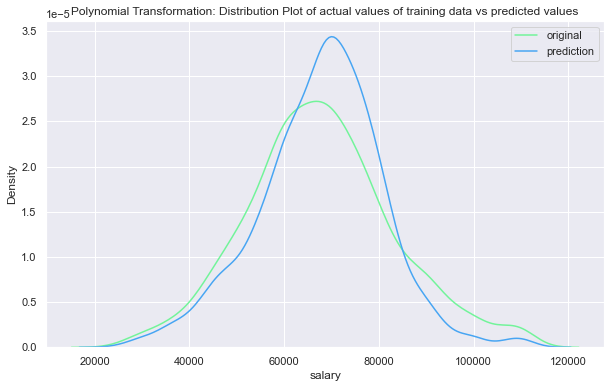

In [33]:
# View distribution plot of actual vs fitted of training data - 
dis_data(sal_train, y_pred_pr, 'Actual Values(train)', 'Predicted Values(train)', title = 'Polynomial Transformation: Distribution Plot of actual values of training data vs predicted values')

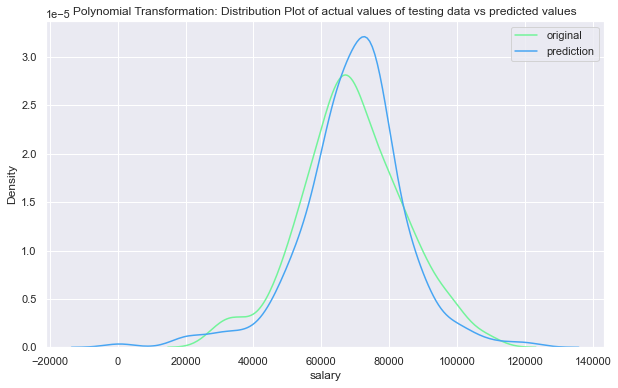

In [34]:
# view distribution plot of actual vs fitted of testing data - 
dis_data(sal_test, y_pred_prtest, 'Actual Values(test)', 'Predicted Values(test)', title = 'Polynomial Transformation: Distribution Plot of actual values of testing data vs predicted values')

#### We still want to get better and next we will applying Ridge regression

In [35]:
# create a ridge regression object and fit it to training data 
RidgeModel = Ridge(alpha = 1.0)
RidgeModel.fit(feat_train_pr, sal_train)

Ridge()

In [36]:
# predict values of training data and testing data
y_pred_Ridge_train = RidgeModel.predict(feat_train_pr)
y_pred_Ridge_test = RidgeModel.predict(feat_test_pr)

In [37]:
# MAE and accuracy of train data -
evaluate(RidgeModel, y_pred_Ridge_train, feat_train, sal_train)

Model Performance
Average Error: 6251.0682 €.
Accuracy = 90.58%.


In [38]:
# MAE and accuracy of test data -
evaluate(RidgeModel, y_pred_Ridge_test, feat_test, sal_test)

Model Performance
Average Error: 9163.5630 €.
Accuracy = 85.53%.


The MAE of the Trainingsdata goes round 500€ up, but the MAE of test data goes ~ 2000€ down

We used alpha = 1.0 and are still not happy with the results. So we try to use Grid Search to ensure the right parameters are used.

In [39]:
# define the hyperparameter - 
parameters1 = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [40]:
# Create a new Ridge Regression object - 
RM = Ridge()

In [41]:
# create a gridsearch object and pass RM, parameters1 to it. 
Grid = GridSearchCV(RM, parameters1, cv = 5)

In [42]:
# fit the grid search model to the training data - 
Grid.fit(feat_train, sal_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [43]:
# assign best estimator - 
bestRM = Grid.best_estimator_
bestRM

Ridge(alpha=1)

#### We get the result that alpha = 1 is the best parameter, which we used before.

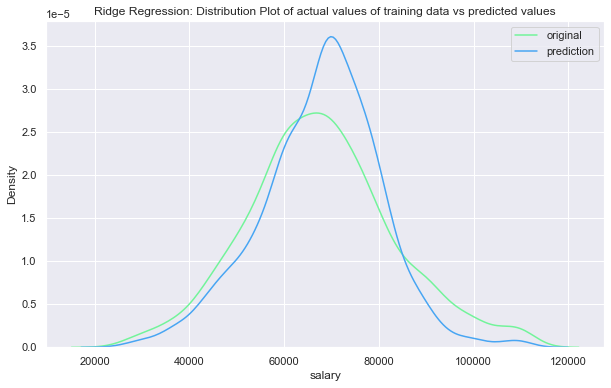

In [44]:
# View distribution plot of actual vs fitted of training data - 
dis_data(sal_train, y_pred_Ridge_train, 'Actual Values(train)', 'Predicted Values(train)', title = 'Ridge Regression: Distribution Plot of actual values of training data vs predicted values')

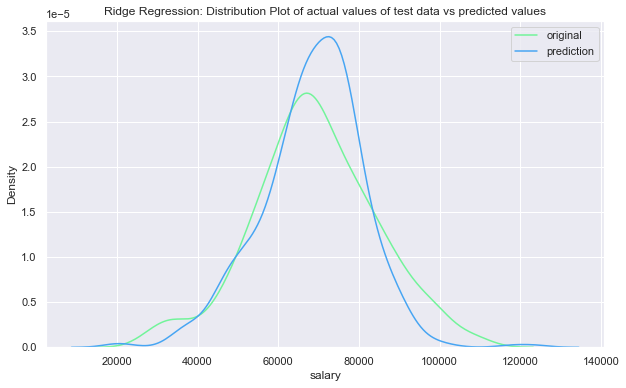

In [45]:
# View distribution plot of actual vs fitted of test data - 
dis_data(sal_test, y_pred_Ridge_test, 'Actual Values(train)', 'Predicted Values(train)', title = 'Ridge Regression: Distribution Plot of actual values of test data vs predicted values')

#### Next we try using Random Forest and fit a Randorm Forest with random_state = 42 for consistency


In [46]:
# create a random forest object - 
RF = RandomForestRegressor(n_estimators = 150, n_jobs = 2, max_features = 30, random_state=42)
RF

RandomForestRegressor(max_features=30, n_estimators=150, n_jobs=2,
                      random_state=42)

In [47]:
# fit a Random Forest model on training data - 
RF.fit(feat_train, sal_train)

RandomForestRegressor(max_features=30, n_estimators=150, n_jobs=2,
                      random_state=42)

In [48]:
# make predictions on trainings and test data and print the first five - 
y_pred_RF_train = RF.predict(feat_train)
y_pred_RF_test = RF.predict(feat_test)

In [49]:
evaluate(RF, y_pred_RF_train, feat_train, sal_train)

Model Performance
Average Error: 3711.3560 €.
Accuracy = 94.20%.


In [50]:
evaluate(RF, y_pred_RF_test, feat_test, sal_test)

Model Performance
Average Error: 8969.8007 €.
Accuracy = 85.55%.


We reduced the MAE of the train and test data each by round 2000 €

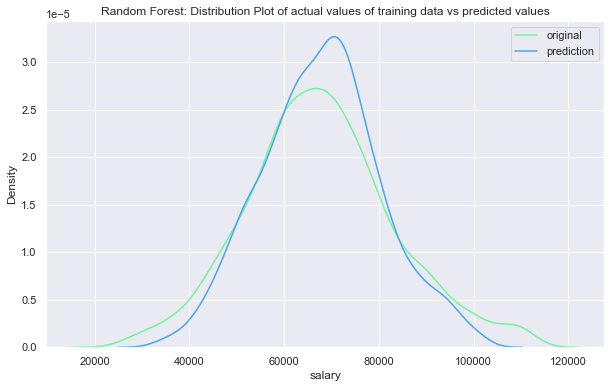

In [51]:
# View distribution plot of actual vs fitted of training data - 
dis_data(sal_train, y_pred_RF_train, 'Actual Values(train)', 'Predicted Values(train)', title = 'Random Forest: Distribution Plot of actual values of training data vs predicted values')

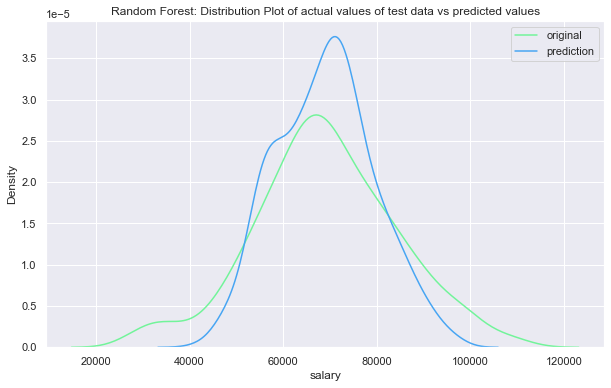

In [52]:
# View distribution plot of actual vs fitted of test data - 
dis_data(sal_test, y_pred_RF_test, 'Actual Values(train)', 'Predicted Values(train)', title = 'Random Forest: Distribution Plot of actual values of test data vs predicted values')

#### Now we try to improve our Hyperparameter for RF to get better results.
First we use a Random Search and then we use Grid Search based on the parameters we found before

In [53]:
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(feat_train, sal_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [56]:
# print the best parameters
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [57]:
best_random = rf_random.best_estimator_

In [58]:
# predict values of training data and testing data with best grid parameters
y_pred_random_train = best_random.predict(feat_train)
y_pred_random_test = best_random.predict(feat_test)

In [59]:
evaluate(best_random, y_pred_random_train, feat_train, sal_train)

Model Performance
Average Error: 6122.6229 €.
Accuracy = 90.53%.


In [60]:
evaluate(best_random, y_pred_random_test, feat_test, sal_test)

Model Performance
Average Error: 8776.4510 €.
Accuracy = 85.94%.


The MAE of the trainings data goes up by round 2000€. The MAE of the test data remains the same.

In [61]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1600, 1800, 2000, 2100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [62]:
# Fit the grid search to the data
grid_search.fit(feat_train, sal_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [63]:
best_grid

RandomForestRegressor(max_depth=70, max_features=3, min_samples_split=8,
                      n_estimators=2100)

In [64]:
# predict values of training data and testing data with best grid parameters
y_pred_bestgrid_train = best_grid.predict(feat_train)
y_pred_bestgrid_test = best_grid.predict(feat_test)

In [65]:
# evaluate model -trainingsdata
evaluate(best_grid, y_pred_bestgrid_train, feat_train, sal_train)

Model Performance
Average Error: 6790.9248 €.
Accuracy = 89.24%.


In [66]:
# evaluate model -testdata
evaluate(best_grid, y_pred_bestgrid_test, feat_test, sal_test)

Model Performance
Average Error: 8957.2171 €.
Accuracy = 85.63%.


Both MAEs goes a little bit up. The Hyperparameter tuning didn't fit our use case.

### Conclusion

The Hyperparameter tuning by Random Forest doesn't work really well because it didn't improve our result much. \
We got the best result with linear regression with the result of 86,1% on the test date. However, all models were pretty much in the same range.


Note: During the project, we noticed that we didn’t have an optimal database for our project. We also didn’t find a freely available data set that was larger and our attempts to request data from other sources (like glassdoor) also failed. 
In any case, we have learned to pay more attention to a sufficiently large database from the beginning in the future, as well as that all features contain enough data.